<a href="https://colab.research.google.com/github/Hira63S/DS-Unit-1-Sprint-3-Data-Storytelling/blob/master/Hira_DS_Unit_1_Sprint_Challenge_3_Data_Storytelling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Science Unit 1 Sprint Challenge 3

# Data Storytelling

In this sprint challenge you'll work with a dataset from **FiveThirtyEight's article, [Every Guest Jon Stewart Ever Had On ‘The Daily Show’](https://fivethirtyeight.com/features/every-guest-jon-stewart-ever-had-on-the-daily-show/)**!

# Part 0 — Run this starter code

You don't need to add or change anything here. Just run this cell and it loads the data for you, into a dataframe named `df`.

(You can explore the data if you want, but it's not required to pass the Sprint Challenge.)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

url = 'https://raw.githubusercontent.com/fivethirtyeight/data/master/daily-show-guests/daily_show_guests.csv'
df = pd.read_csv(url).rename(columns={'YEAR': 'Year', 'Raw_Guest_List': 'Guest'})

def get_occupation(group):
    if group in ['Acting', 'Comedy', 'Musician']:
        return 'Acting, Comedy & Music'
    elif group in ['Media', 'media']:
        return 'Media'
    elif group in ['Government', 'Politician', 'Political Aide']:
        return 'Government and Politics'
    else:
        return 'Other'
      
df['Occupation'] = df['Group'].apply(get_occupation)

# Part 1 — What's the breakdown of guests’ occupations per year?

For example, in 1999, what percentage of guests were actors, comedians, or musicians? What percentage were in the media? What percentage were in politics? What percentage were from another occupation?

Then, what about in 2000? In 2001? And so on, up through 2015.

So, **for each year of _The Daily Show_, calculate the percentage of guests from each occupation:**
- Acting, Comedy & Music
- Government and Politics
- Media
- Other

#### Hints:
You can make a crosstab. (See pandas documentation for examples, explanation, and parameters.)

You'll know you've calculated correctly when the percentage of "Acting, Comedy & Music" guests is 90.36% in 1999, and 45% in 2015.

**Optional Bonus Challenge:** Do additional insightful data exploration.

In [19]:
df.head()

,Year,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
0,1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
2,1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
3,1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
4,1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [20]:
df[df.Year == 1999].sort_values(by='Occupation').sum()

Year                                                     331834
Show          1/11/995/19/995/20/995/24/995/25/995/26/995/27...
Guest         Michael J. FoxCamryn ManheimRay RomanoPatricia...
Occupation    Acting, Comedy & MusicActing, Comedy & MusicAc...
dtype: object

In [0]:
df.set_index('Year', inplace=True)

In [25]:
df.head()

,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
Year,,,,,
1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


AttributeError: ignored

In [0]:
pd.set_option('display.max_rows', 500)

In [0]:
subset = pd.DataFrame(df.groupby('Year')['Occupation'].value_counts())

In [0]:
subset['percent'] = (100 * subset['Occupation'].value_counts(normalize = True))

In [40]:
subset.head()

Occupation  percent
Year Occupation                                  
1999 Acting, Comedy & Music          150      NaN
     Media                            11      NaN
     Other                             3      NaN
     Government and Politics           2      NaN
2000 Acting, Comedy & Music          125      NaN

In [0]:
subset = pd.DataFrame({'Year' : ['1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015'],
                       'Acting, Comedy & Music' : ['90.36', '73.96', '72.61', '62.30', '56.02', '37.30', '37.04', '36.02', '25', '20.73', '20.86', '35.15', '33.74', '26.83', '42.77', '39.26',
                                                '45'],
                       'Media' : ['6.06', '12', '19.74', '26.4', '24.69', '26.62', '33.33', '29.19', '33', '46.95', '36.20', '30.30', '31.29', '31.71', '30.72', '32.52', '24'],
                       'Government and Politics' : ['2', '8.3', '3.82', '6.92', '10.20', '21.90', '16.05', '19.25', '17.02', '20.12', '20.86', '18.18', '16.56', '20.12', '12.65', '12.88',
                                                  '17'],
                       'Other' : ['1', '5.3', '3.82', '4.4', '9.4', '11.24', '13.60', '15.53', '24', '12.20', '22.10', '16.36', '18.40', '21.30','13.86','15.34','14']})

In [44]:
subset.head()

,"Acting, Comedy & Music",Government and Politics,Media,Other,Year
0,90.36,2,6.06,1,1999
1,73.96,8.3,12,5.3,2000
2,72.61,3.82,19.74,3.82,2001
3,62.30,6.92,26.4,4.4,2002
4,56.02,10.20,24.69,9.4,2003


In [0]:
subset.set_index('Year', inplace=True)

In [46]:
subset.head()

,"Acting, Comedy & Music",Government and Politics,Media,Other
Year,,,,
1999,90.36,2,6.06,1
2000,73.96,8.3,12,5.3
2001,72.61,3.82,19.74,3.82
2002,62.30,6.92,26.4,4.4
2003,56.02,10.20,24.69,9.4


In [0]:
subset = df.groupby('Occupation')['Year'].apply((lambda x: x.astype(float)/x.sum()*100))


In [55]:
subset.dtypes

Acting, Comedy & Music     object
Government and Politics    object
Media                      object
Other                      object
dtype: object

In [0]:
subset = subset.astype('float')

In [106]:
df['Occupation'].value_counts()

Acting, Comedy & Music     1203
Media                       756
Government and Politics     384
Other                       350
Name: Occupation, dtype: int64

In [107]:
df.describe()

,Year
count,2693.000000
mean,2006.816190
std,4.828177
min,1999.000000
25%,2003.000000
50%,2007.000000
75%,2011.000000
max,2015.000000


In [0]:
subset.head(300)

In [0]:
occupations = ['Acting, Comedy & Music', 'Media', 'Government and Politics', 'Other']

In [0]:
percentages = (100 * df['Occupation'].value_counts(normalize = True))

In [80]:
percentages

Acting, Comedy & Music     44.671370
Media                      28.072781
Government and Politics    14.259190
Other                      12.996658
Name: Occupation, dtype: float64

In [0]:
df.set_index('Occupation')

In [0]:
df.set_index('Year', inplace = True)

###How to get Percentage###

# Part 2 — Recreate this explanatory visualization:

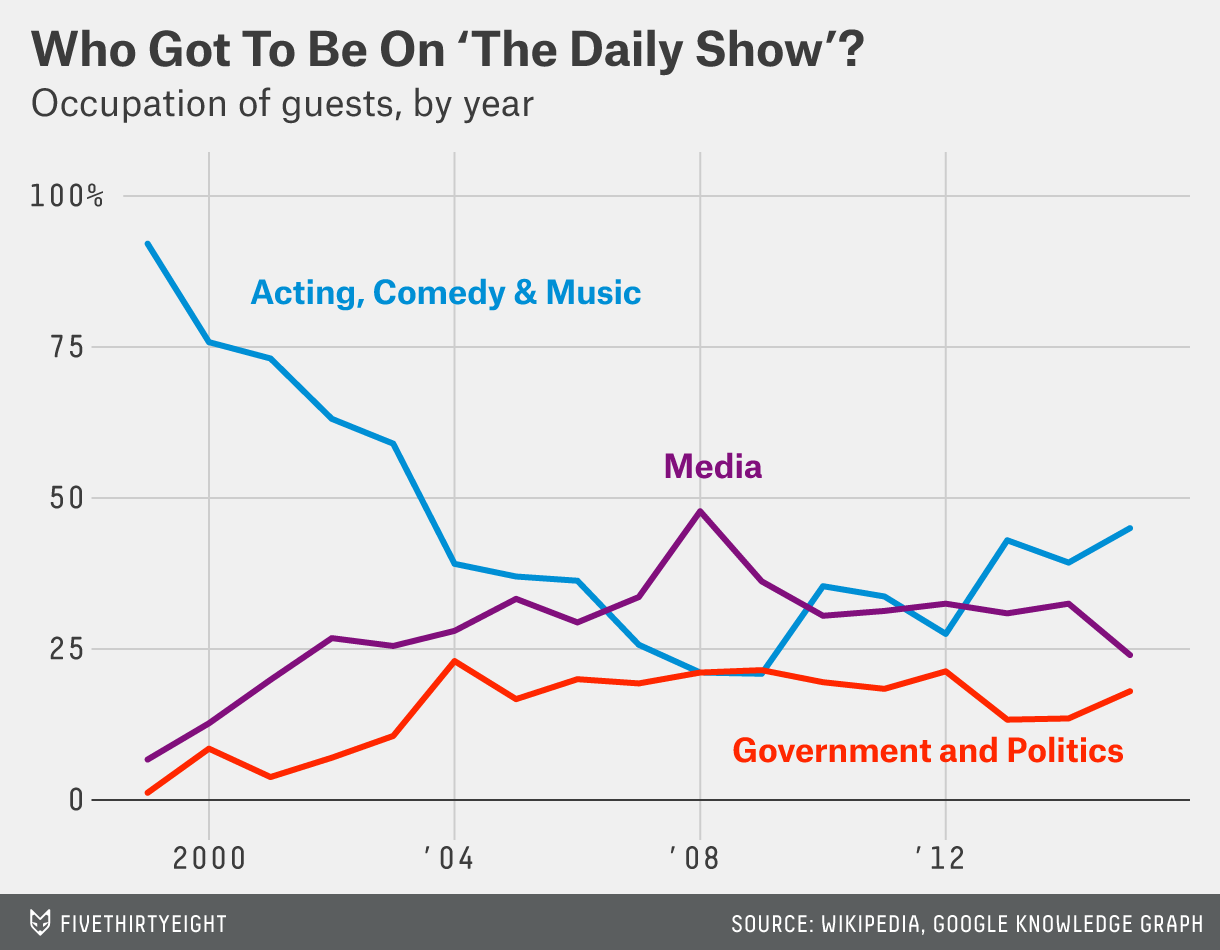

In [50]:
from IPython.display import display, Image
png = 'https://fivethirtyeight.com/wp-content/uploads/2015/08/hickey-datalab-dailyshow.png'
example = Image(png, width=500)
display(example)

**Hints:**
- You can choose any Python visualization library you want. I've verified the plot can be reproduced with matplotlib, pandas plot, or seaborn. I assume other libraries like altair or plotly would work too.
- If you choose to use seaborn, you may want to upgrade the version to 0.9.0.

**Expectations:** Your plot should include:
- 3 lines visualizing "occupation of guests, by year." The shapes of the lines should look roughly identical to 538's example. Each line should be a different color. (But you don't need to use the _same_ colors as 538.)
- Legend or labels for the lines. (But you don't need each label positioned next to its line or colored like 538.)
- Title in the upper left: _"Who Got To Be On 'The Daily Show'?"_ with more visual emphasis than the subtitle. (Bolder and/or larger font.)
- Subtitle underneath the title: _"Occupation of guests, by year"_

**Optional Bonus Challenge:**
- Give your plot polished aesthetics, with improved resemblance to the 538 example.
- Any visual element not specifically mentioned in the expectations is an optional bonus.

In [0]:
subset = subset.drop(columns='Other')

Text(2002, 80, 'Acting, Comedy & Music')

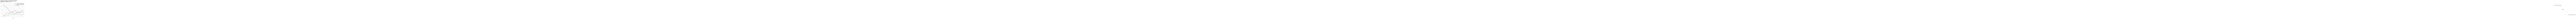

In [80]:
ax = subset.plot()
color_sequence = ['#1f77b4', '#aec7e8', '#ff7f0e']

ax.set(yticks=range(0,110,25), facecolor='#f9f9f9')

#axes.text is very flexible, 
ax.text(x=-2, y=110, s="Who Got To Be On 'The Daily Show?'", fontsize = 14,
       fontweight='bold');

ax.text(x=-2, y=105, s='Occupation of guests, by year', fontsize=12);

ax.tick_params(labelrotation=0)

ax.text(2013, 12, s = 'Government and Politics')
ax.text(2008, 50, s = 'Media')
ax.text(2002, 80, s = 'Acting, Comedy & Music')


# Part 3 — Who were the top 10 guests on _The Daily Show_?

**Make a plot** that shows their names and number of appearances.

**Add a title** of your choice.

**Expectations:** It's ok to make a simple, quick plot: exploratory, instead of explanatory. 

**Optional Bonus Challenge:** You can change aesthetics and add more annotation. For example, in a relevant location, could you add the text "19" to show that Fareed Zakaria appeared 19 times on _The Daily Show_? (And so on, for each of the top 10 guests.)

In [85]:
df.head()

,GoogleKnowlege_Occupation,Show,Group,Guest,Occupation
Year,,,,,
1999,actor,1/11/99,Acting,Michael J. Fox,"Acting, Comedy & Music"
1999,Comedian,1/12/99,Comedy,Sandra Bernhard,"Acting, Comedy & Music"
1999,television actress,1/13/99,Acting,Tracey Ullman,"Acting, Comedy & Music"
1999,film actress,1/14/99,Acting,Gillian Anderson,"Acting, Comedy & Music"
1999,actor,1/18/99,Acting,David Alan Grier,"Acting, Comedy & Music"


In [0]:
top_products = (order_products['product_id'].value_counts())

top_products = pd.DataFrame({'Number_of_products': top_products.values, 'product_id': top_products.index, })

In [0]:
top_guests = (df['Guest'].value_counts())

top_guests = pd.DataFrame({'Number of Appearances': top_guests.values, 'Guest': top_guests.index})

In [0]:
top_10 = top_guests.head(10)

In [108]:
top_10

,Number of Appearances
Guest,
Fareed Zakaria,19
Denis Leary,17
Brian Williams,16
Ricky Gervais,13
Paul Rudd,13
Tom Brokaw,12
Reza Aslan,10
Will Ferrell,10
Bill O'Reilly,10


In [0]:
top_10.set_index('Guest', inplace=True)

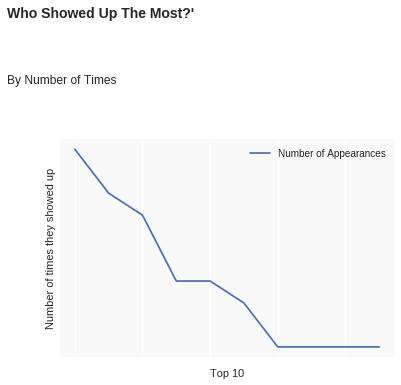

In [111]:
p = top_10.plot()

p.set(xlabel= 'Top 10', ylabel='Number of times they showed up', yticks=range(9,20,15), facecolor='#f9f9f9')

p.text(x=-2, y=25, s="Who Showed Up The Most?'", fontsize = 14,
       fontweight='bold');

p.text(x=-2, y=22, s='By Number of Times', fontsize=12);


###How to make their names appear on the graph###
 
 -I reset the index so that their name would be on the x-axis and number of appearances on the y-axis. 